## Práctica 2: Propiedades estadísticas de la lengua

### Fecha de entrega: 2 de Marzo de 2025 11:59pm


### 1. Verificar si la ley de Zipf se cumple en un lenguaje artificial creado por ustedes

In [1]:
import random
import string
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

In [2]:
# Devuelve una palabra compuesta de caracteres aleatorios.
def crear_palabra(long_min=4, long_max=10):
    longitud = random.randint(long_min, long_max)
    return ''.join(random.choices(string.ascii_lowercase, k=longitud))

In [3]:
vocabulario = [crear_palabra() for _ in range(5000)]

In [4]:
corpus = ' '.join(random.choices(vocabulario, k=100000))

In [5]:
conteo = Counter(corpus.split())
df_frecuencias = pd.DataFrame(conteo.items(), columns=["palabra", "frecuencia"])
df_frecuencias = df_frecuencias.sort_values(by="frecuencia", ascending=False).reset_index(drop=True)
print(df_frecuencias.head())

      palabra  frecuencia
0    hxycryqe          36
1  kkgrfajkkt          35
2      qybpnn          35
3      vyohof          35
4   rgzxhtzuf          34


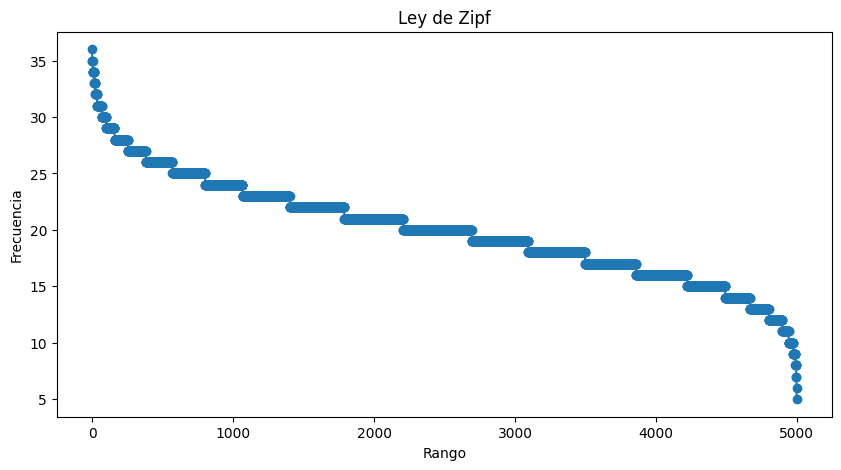

In [9]:
plt.figure(figsize=(10,5))
plt.plot(df_frecuencias["frecuencia"].values, marker="o")
plt.title("Ley de Zipf")
plt.xlabel("Rango")
plt.ylabel("Frecuencia")
plt.show()

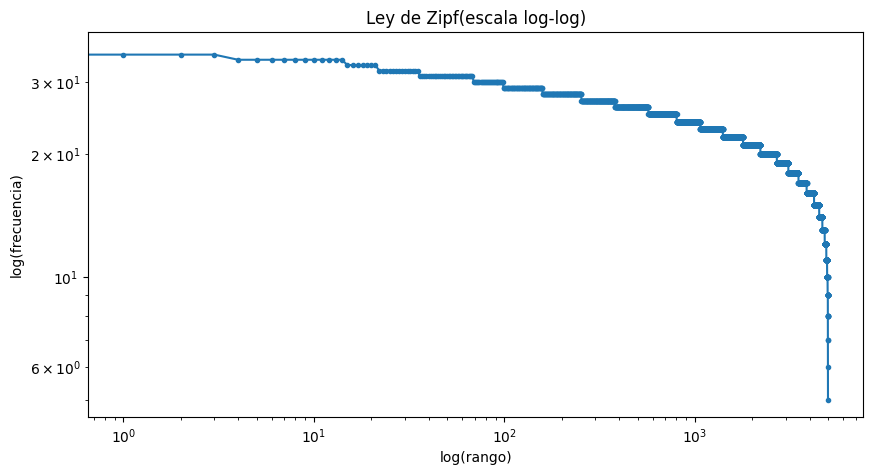

In [8]:
plt.figure(figsize=(10,5))
plt.loglog(df_frecuencias["frecuencia"].values, marker=".")
plt.title("Ley de Zipf(escala log-log)")
plt.xlabel("log(rango)")
plt.ylabel("log(frecuencia)")
plt.show()

En el lenguaje artificial generado aleatoriamente, se observa que la distribución de frecuencias no sigue exactamente la ley de Zipf. Aunque las palabras más frecuentes son evidentemente más comunes, la relación entre el rango y la frecuencia no muestra la pendiente empinada característica de lenguajes naturales. Esto ocurre porque, en este experimento, las palabras se distribuyen de forma completamente aleatoria y no existen patrones semánticos o gramaticales que provoquen que ciertas palabras predominen sobre otras. Así, el resultado refleja una distribución más uniforme y menos jerárquica que la esperada según Zipf.

### Ejercicio 2

2. Explorar `datasets` del sitio [Hugging Face](https://huggingface.co/datasets) y elegir documentos de diferentes dominios en Español (al menos 3). Realizar reconocimiento de entidades nombradas (NER).
    - Pueden utilizar subconjuntos de los datasets encontrados
    - Mostrar resultados del reconocimiento
    - Una distribución de frecuencias de las etiquetas más comunes en cada dominio
    - Comentarios generales del desempeño observado.


In [14]:
from datasets import load_dataset
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt

import es_core_news_md
nlp = es_core_news_md.load()

In [26]:
import glob

ruta_archivos_json = "./"
archivos_json = glob.glob(ruta_archivos_json + "es_*.json")
dfs_json = [pd.read_json(archivo, lines=True) for archivo in archivos_json]
df_noticias = pd.concat(dfs_json, ignore_index=True)
print("✅ DataFrame de Noticias (JSON) cargado con shape:", df_noticias.shape)

df_finanzas = pd.read_parquet("./finanzas.parquet")
print("✅ DataFrame de Finanzas (Parquet) cargado con shape:", df_finanzas.shape)

✅ DataFrame de Noticias (JSON) cargado con shape: (1, 183880)
✅ DataFrame de Finanzas (Parquet) cargado con shape: (4148, 17)


In [27]:
def extraer_entidades(textos):
    """
    Extrae entidades nombradas de una lista de textos usando spaCy.
    Retorna una lista de (etiqueta, texto).
    """
    entidades = []
    for doc in nlp.pipe(textos, disable=["parser", "tagger"]):
        entidades.extend([(ent.label_, ent.text) for ent in doc.ents])
    return entidades

In [28]:
# Procesamiento de cada dominio

# Financiero
columna_texto_fin = "text" if "text" in df_finanzas.columns else df_finanzas.columns[0]
entidades_fin = extraer_entidades(df_finanzas[columna_texto_fin].dropna().tolist())

In [29]:
def graficar_distribucion(entidades, titulo):
    etiquetas = [label for label, _ in entidades]
    conteo = Counter(etiquetas)

    df = pd.DataFrame(conteo.items(), columns=["Etiqueta", "Frecuencia"]).sort_values(by="Frecuencia", ascending=False)

    plt.figure(figsize=(8,5))
    plt.bar(df["Etiqueta"], df["Frecuencia"], color="skyblue")
    plt.title(f"Frecuencia de entidades - {titulo}")
    plt.xlabel("Etiqueta")
    plt.ylabel("Frecuencia")
    plt.show()

    return df

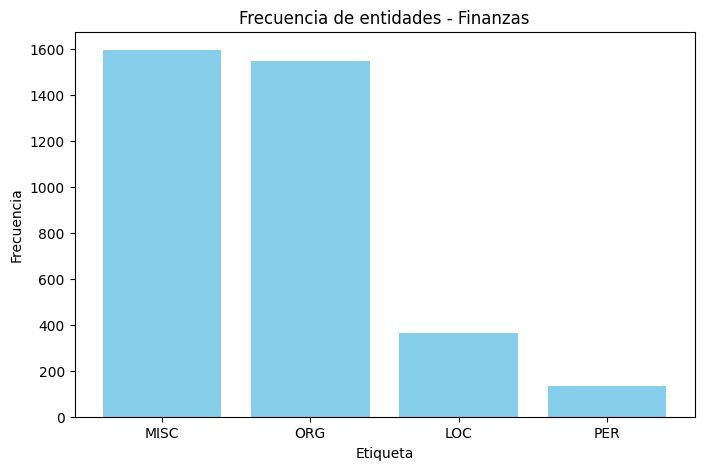


🔵 Ejemplo de entidades en Finanzas: [('ORG', 'Annual Report'), ('MISC', 'Transaction Confirmation'), ('MISC', 'IT support ticket'), ('ORG', 'FIX'), ('ORG', 'Corporate Governance Guidelines'), ('ORG', 'Privacy Policy'), ('ORG', 'Privacy Policy'), ('MISC', 'Securities Prospectus'), ('LOC', 'BAI Format'), ('PER', 'Bill of Lading')]


In [30]:
df_fin = graficar_distribucion(entidades_fin, "Finanzas")

print("\n🔵 Ejemplo de entidades en Finanzas:", entidades_fin[:10])

### Conclusión del análisis de entidades nombradas en el dominio financiero

En finanzas, el modelo de reconocimiento de entidades nombradas (NER) mostró un buen desempeño general. Las entidades más destacadas fueron:

- **MISC**: Agrupando categorías diversas, alcanzó la mayor frecuencia. Esto puede indicar que el modelo reconoce correctamente muchos términos relevantes, pero también puede incluir cierta confusión al clasificar términos ambiguos como "miscellaneous".
- **ORG (Organizaciones)**: Fue la segunda categoría más frecuente, lo cual es totalmente coherente con la naturaleza de los textos financieros, que suelen mencionar nombres de instituciones, empresas y entidades bancarias.
- **LOC (Ubicaciones geográficas)**: Aunque menos frecuente, sigue presente, reflejando la referencia a ciudades, países y zonas importantes en reportes y datos financieros.
- **PER (Personas)**: Su frecuencia fue significativamente menor. Esto se espera, ya que los textos financieros tienden a centrarse más en instituciones y transacciones que en individuos.

---

**Aspectos destacados:**
- La **alta frecuencia de MISC y ORG** confirma que el modelo está detectando bien los actores clave en textos financieros: empresas, bancos y entidades relacionadas.  
- La presencia de **LOC** sugiere que la dimensión geográfica también está cubierta en reportes o textos donde se mencionan mercados internacionales o sedes.  
- La categoría **PER** es menos relevante en estos textos, lo que concuerda con el enfoque institucional y macroeconómico del dominio financiero.

---

**Reflexión final:**
En conjunto, este análisis muestra cómo un sistema NER básico puede adaptarse a distintos dominios y extraer información clave para tareas de minería de texto en el ámbito financiero.
